In [1]:
import data_loader
from experimentor import Experimentor
from augmentor import wGAN_augmentor

Using TensorFlow backend.


--- Loaded in 0.0 seconds ---


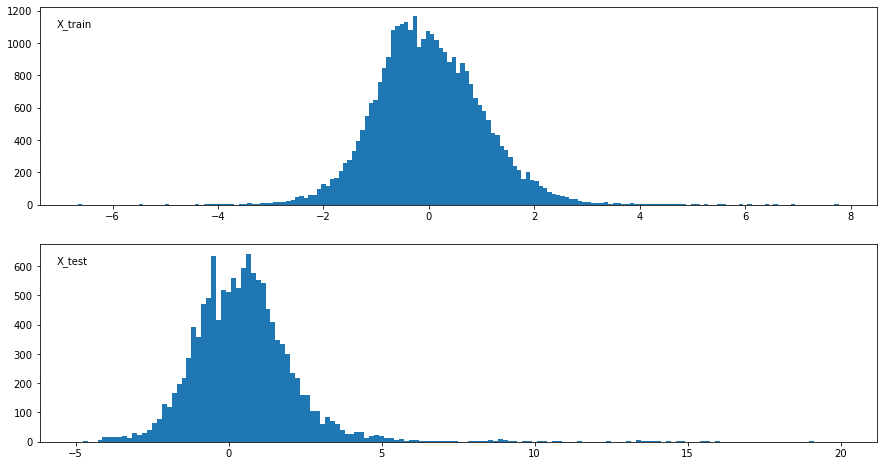

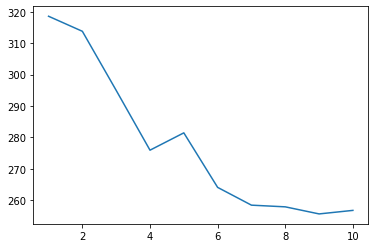

In [2]:
exp_name = 'ICB'
data = data_loader.load_ICB()
exp = Experimentor(data=data, exp_name=exp_name)

In [3]:
# Set model parameters
num_clusters = 4
max_gans = 1


In [4]:
# Re-ordering features with clustering algorithm
exp.X_train, order = wGAN_augmentor.kmeans_ordering(exp.X_train, num_clusters)
exp.X_test = wGAN_augmentor.reorder_test(exp.X_test, order)

In [11]:
wgan = wGAN_augmentor.CWGANGP(X_train=exp.X_train, 
                            y_train=exp.y_train, 
                            model_path=exp.model_path, 
                            model_name=f"deepbiogen_c{num_clusters}_g{max_gans}",
                            epochs=20000,
                            batch_size=128,
                            sample_interval=1000)

Tensor("flatten_11/Reshape:0", shape=(?, ?), dtype=float32)
256


X_train shape: (126, 256)
0 [D loss: 6.834711] [G loss: 0.005151]


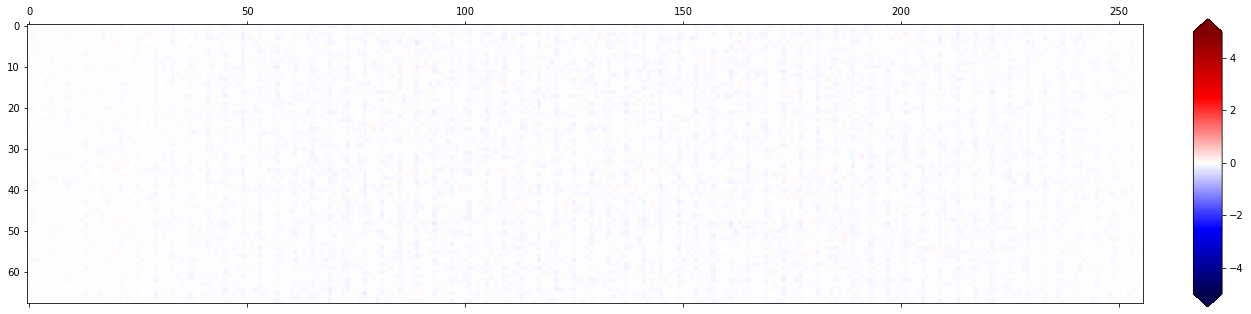

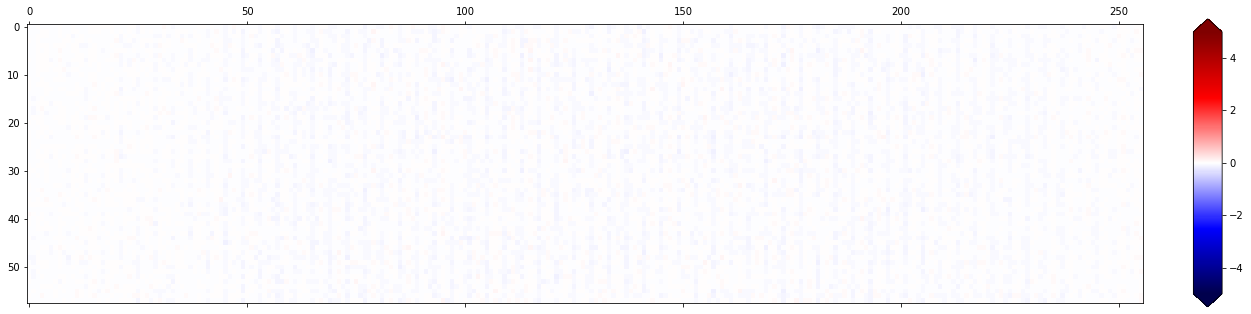

1000 [D loss: -2.699328] [G loss: -10.242554]


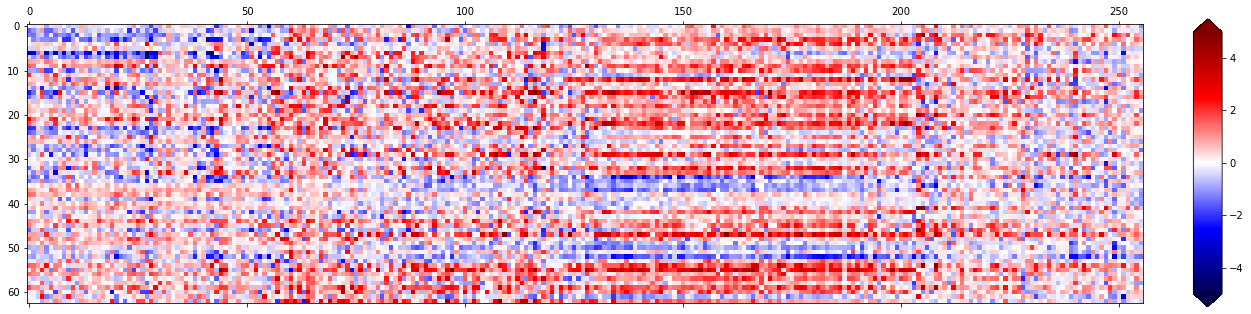

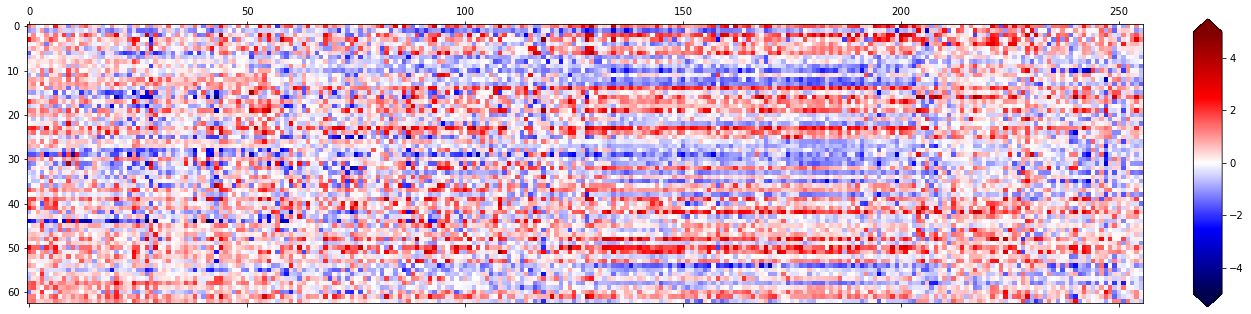

2000 [D loss: -0.814039] [G loss: -18.584763]


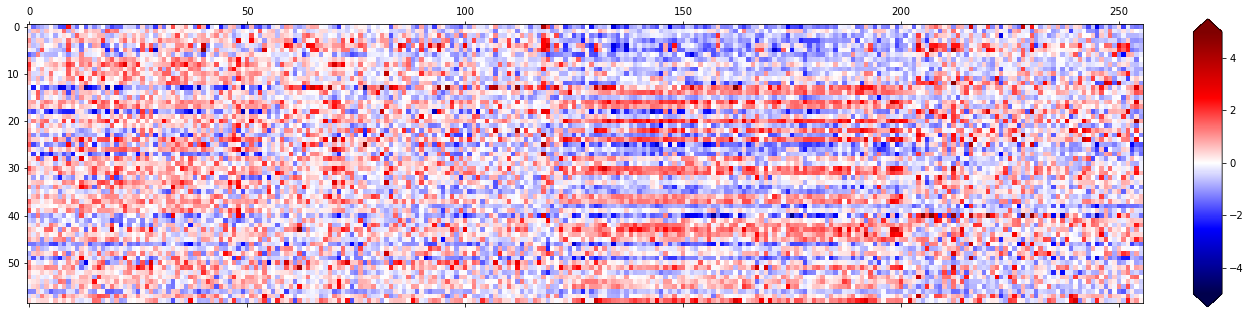

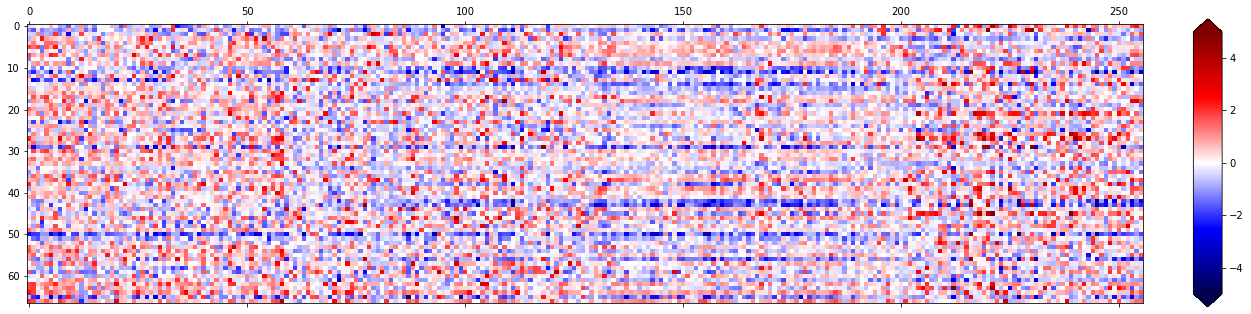

3000 [D loss: -0.653124] [G loss: -25.098190]


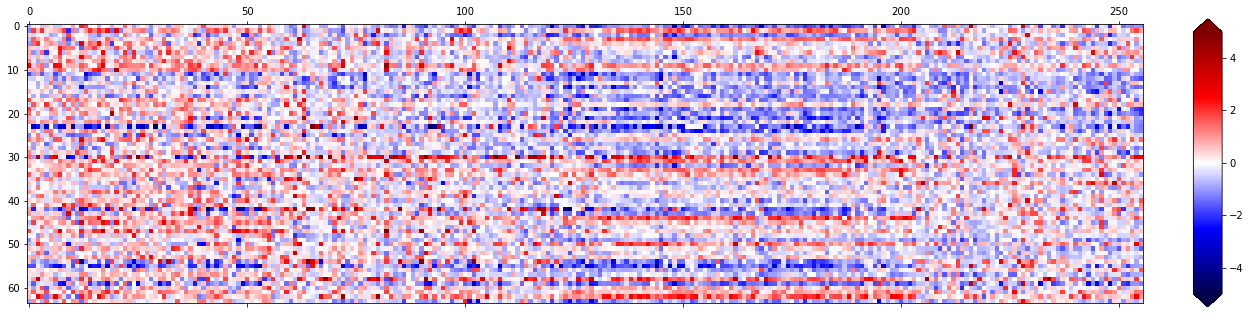

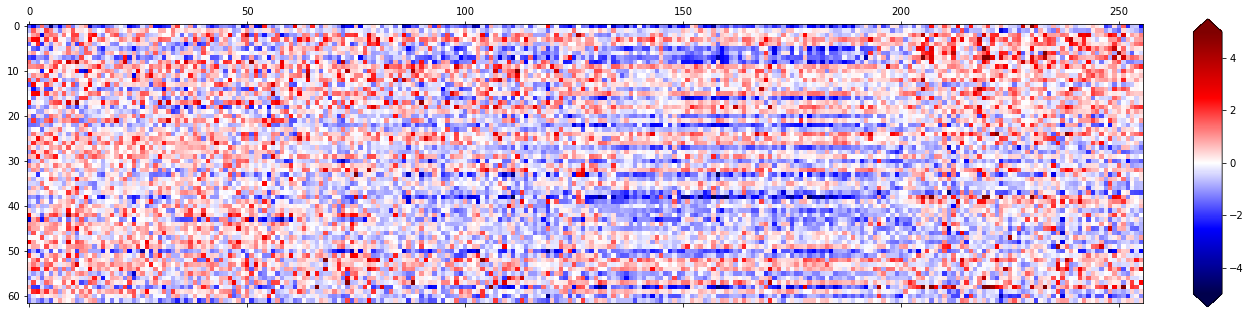

4000 [D loss: -0.581764] [G loss: -27.741814]


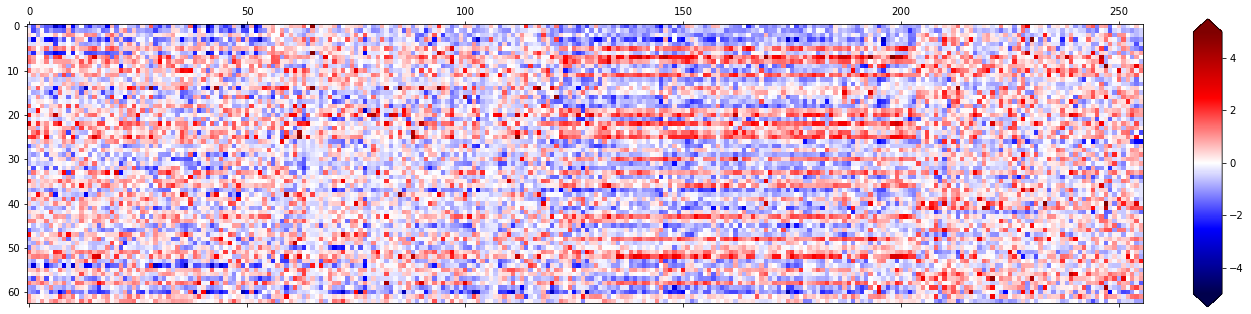

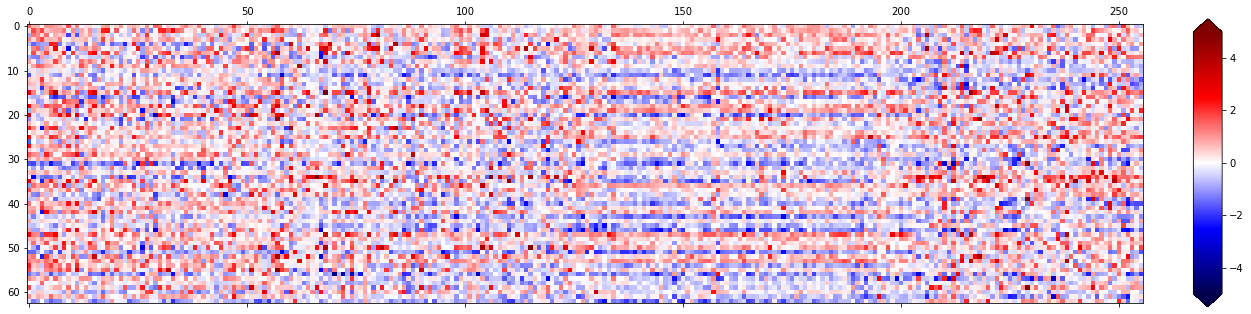

5000 [D loss: -1.053976] [G loss: -26.863720]


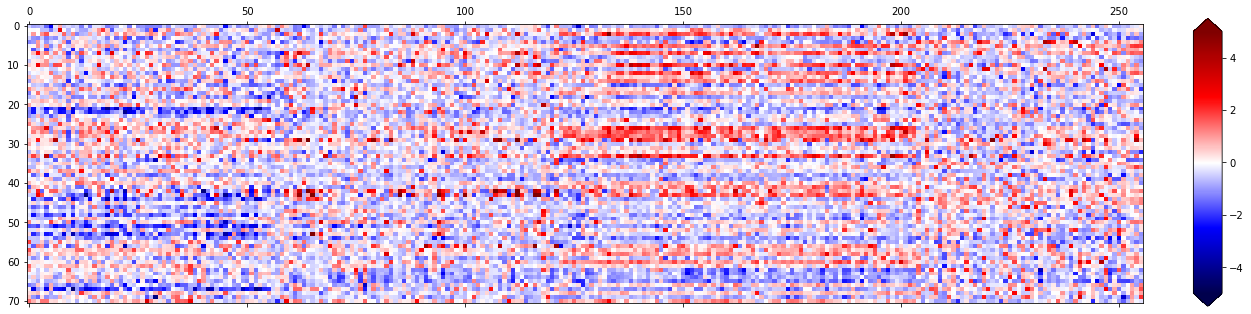

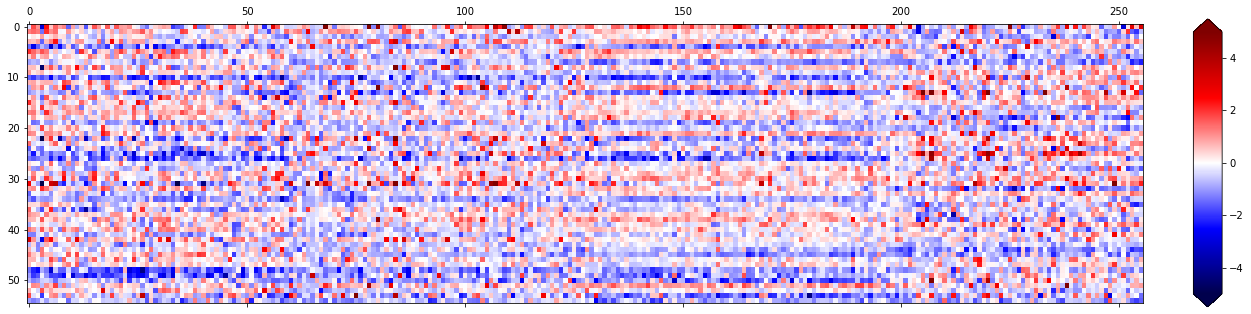

6000 [D loss: -1.101650] [G loss: -25.092373]


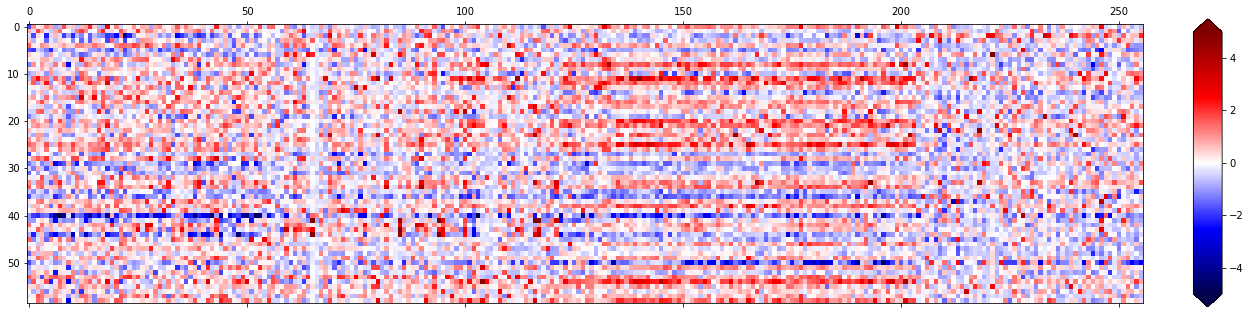

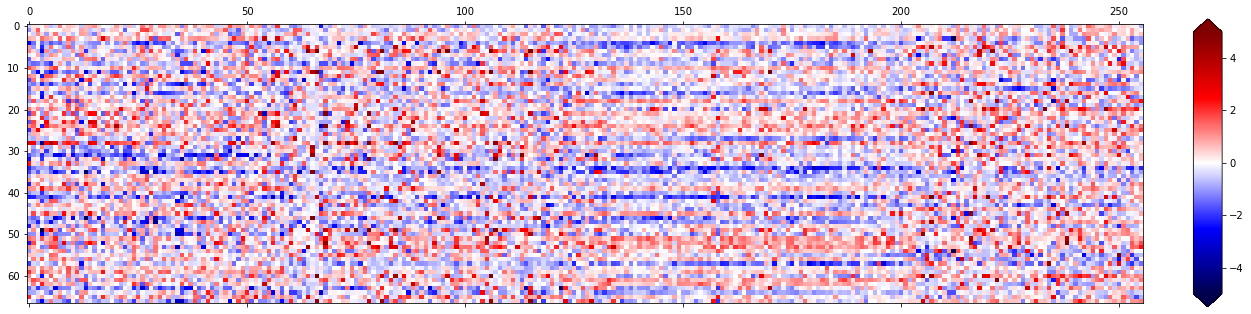

7000 [D loss: -1.337462] [G loss: -23.313129]


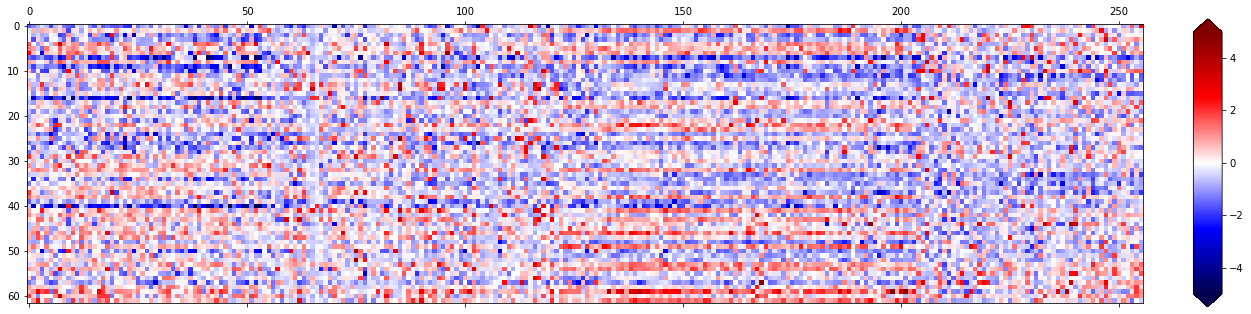

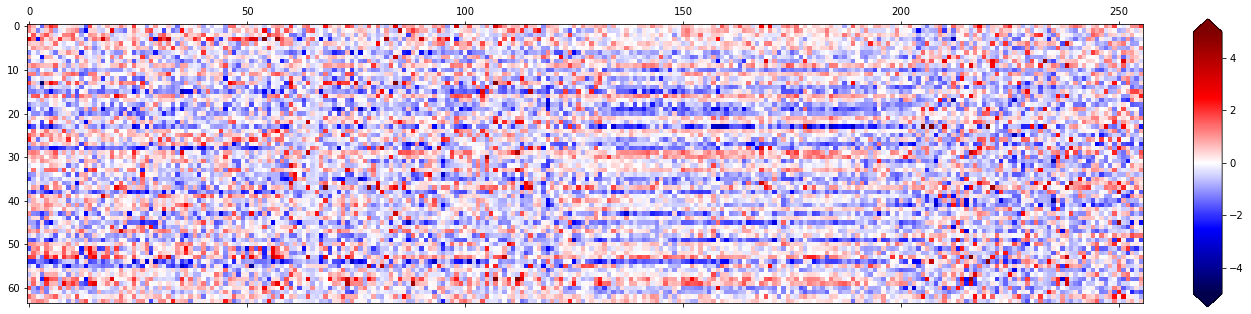

8000 [D loss: -0.800407] [G loss: -21.991678]


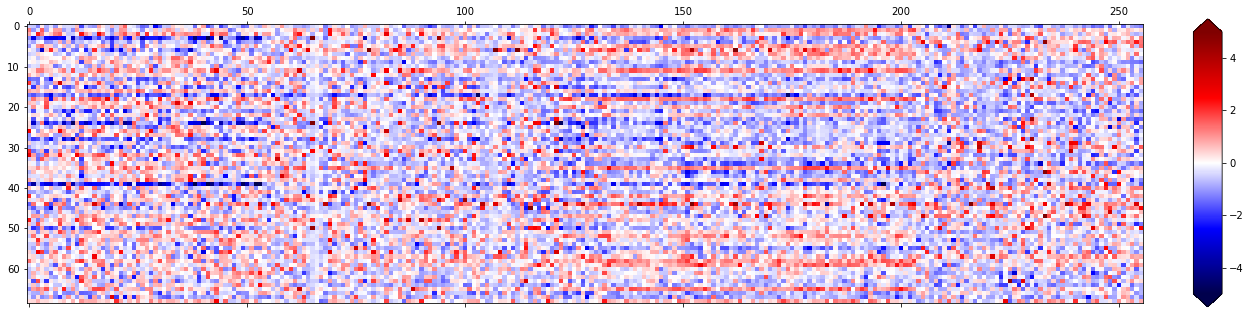

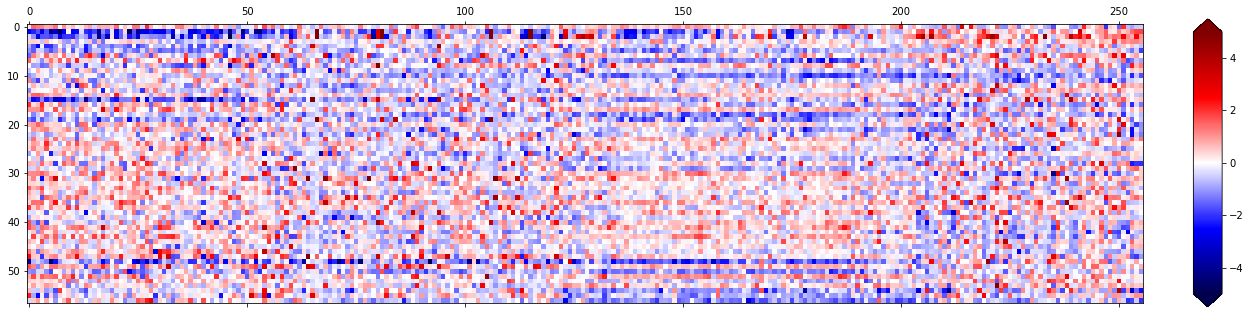

9000 [D loss: -0.839569] [G loss: -19.339083]


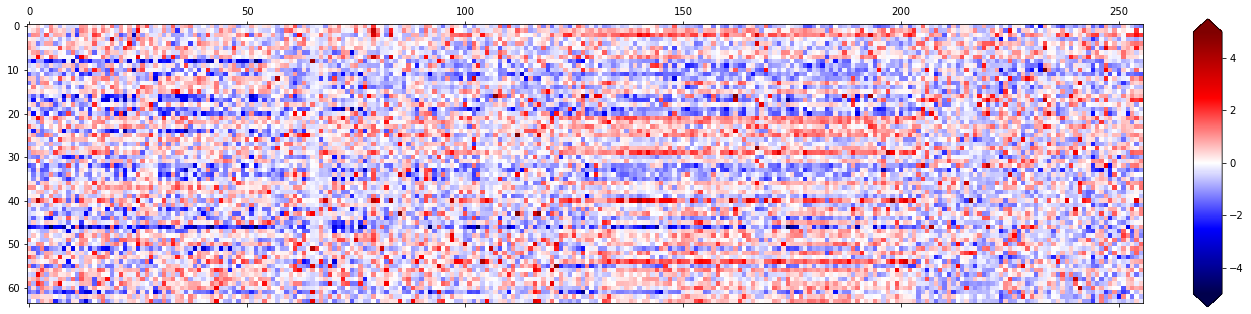

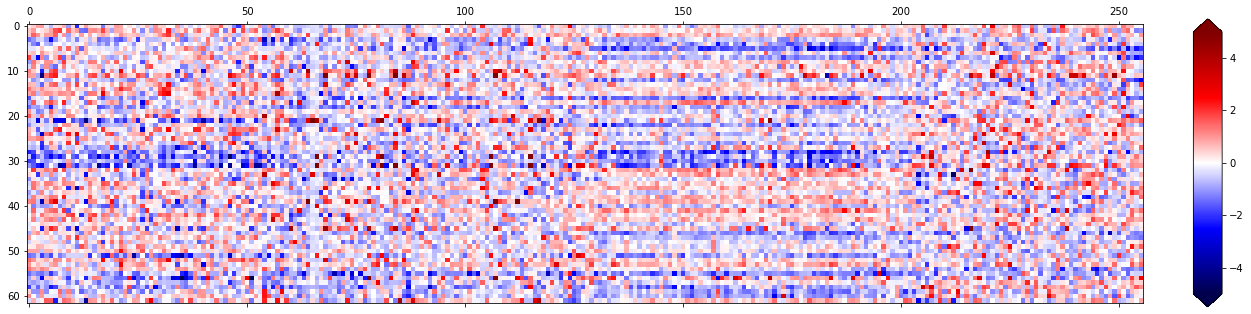

10000 [D loss: -0.993387] [G loss: -19.187546]


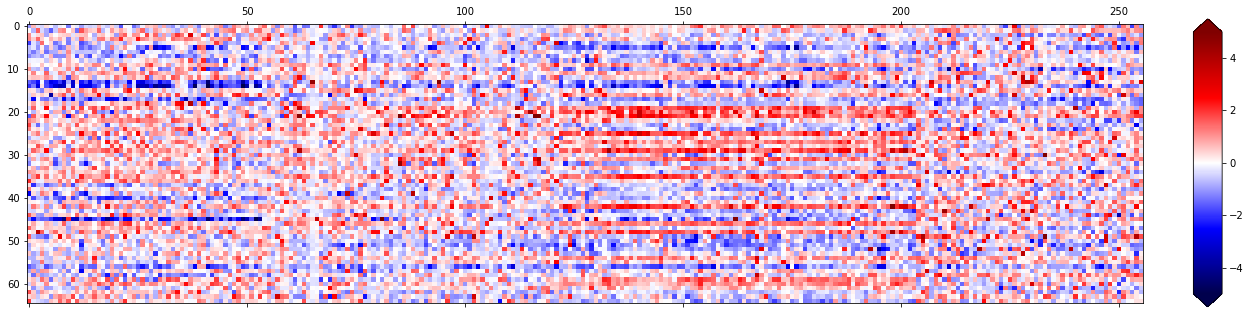

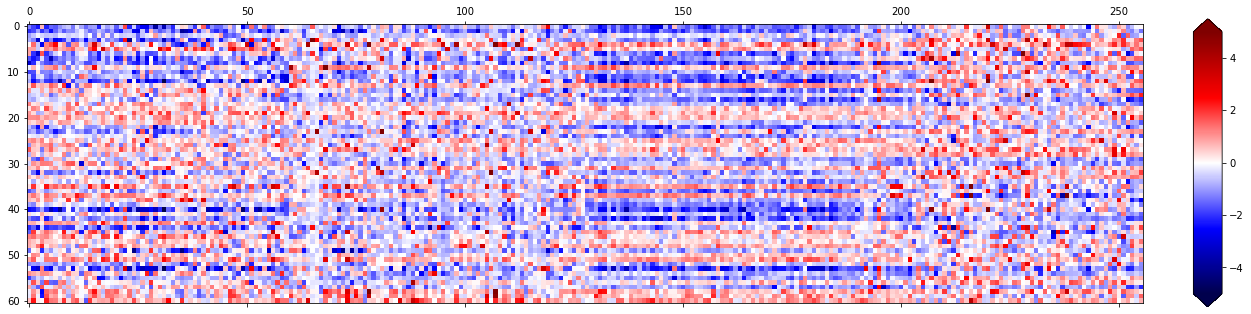

11000 [D loss: -0.760143] [G loss: -17.536291]


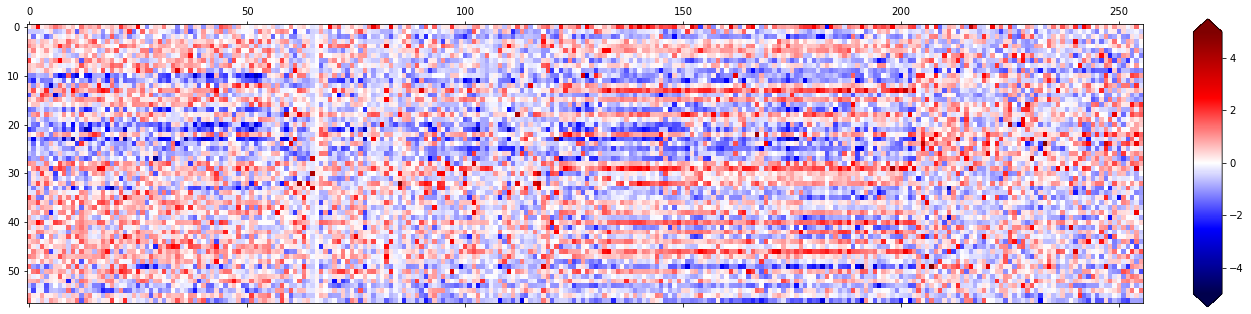

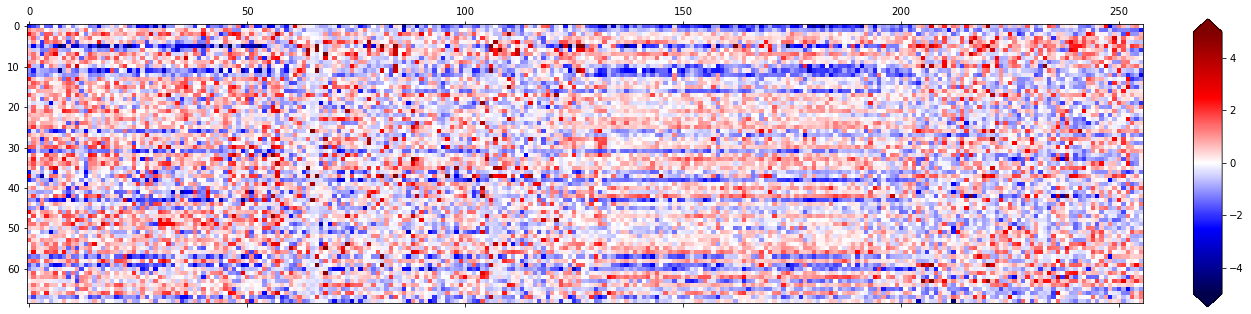

12000 [D loss: -0.834632] [G loss: -15.730215]


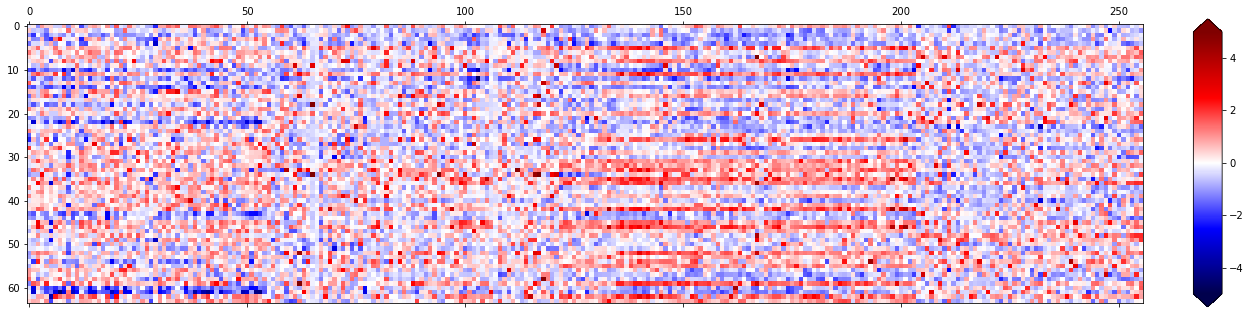

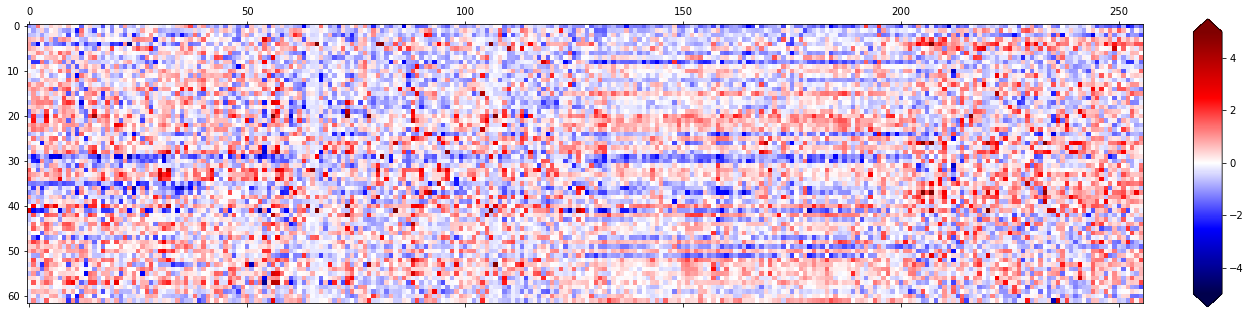

13000 [D loss: -0.703076] [G loss: -15.029576]


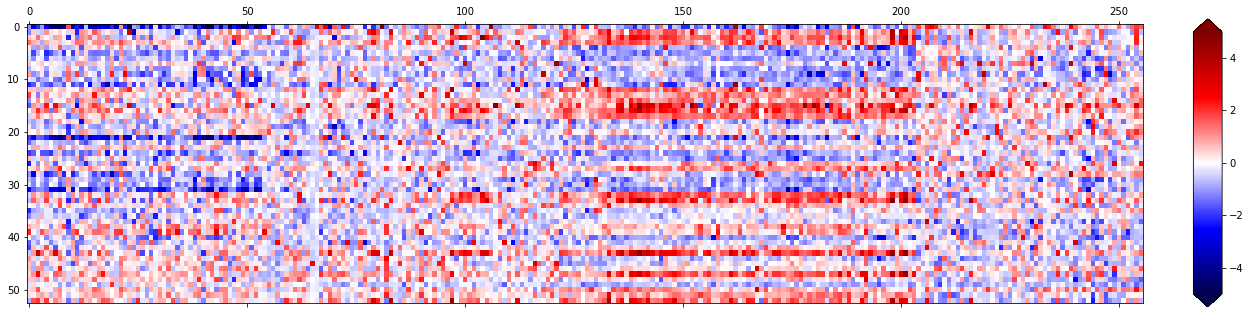

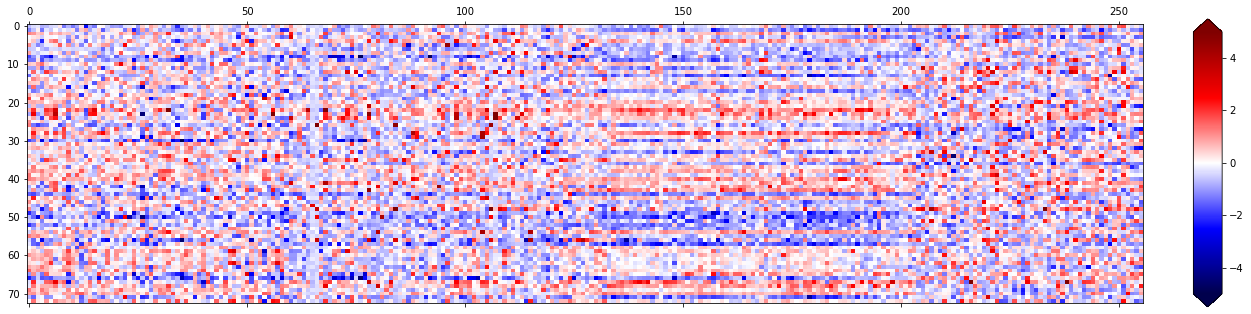

14000 [D loss: -1.102054] [G loss: -14.349409]


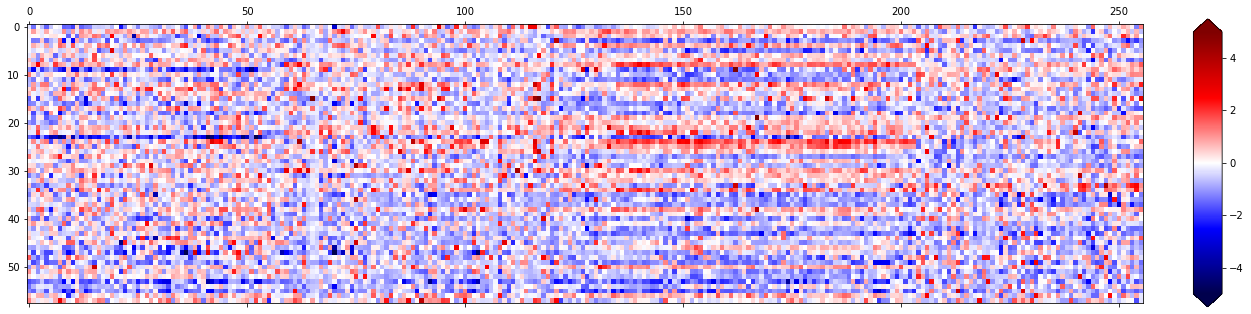

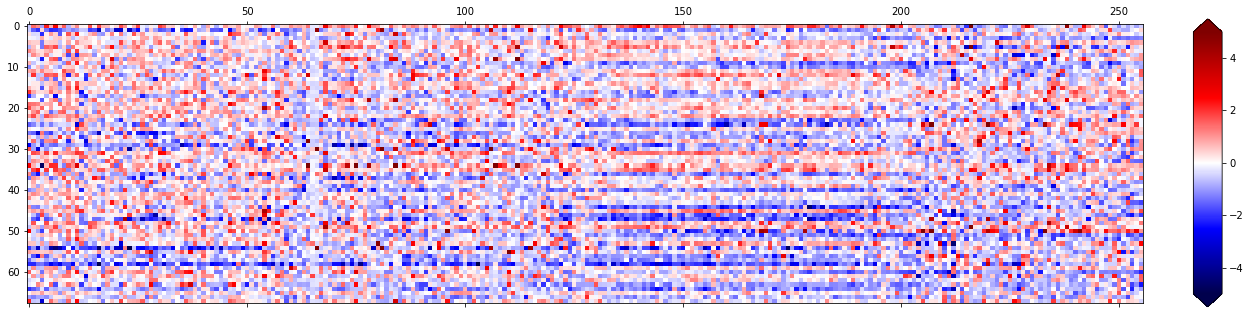

15000 [D loss: -0.807318] [G loss: -13.261074]


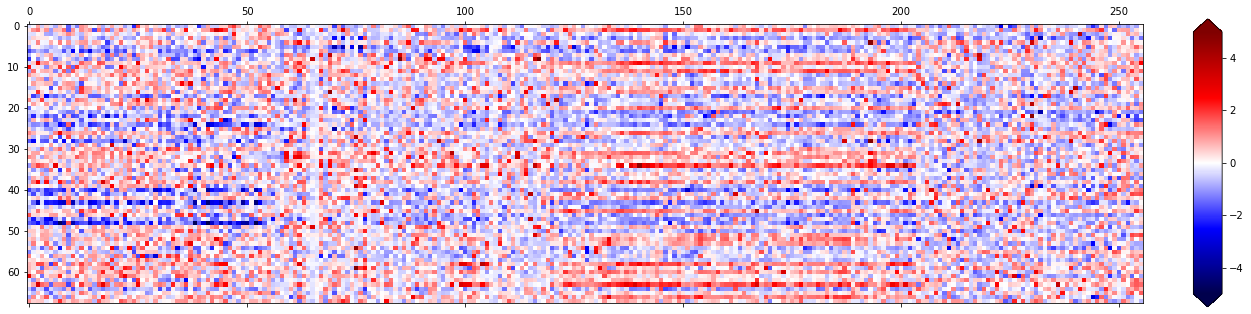

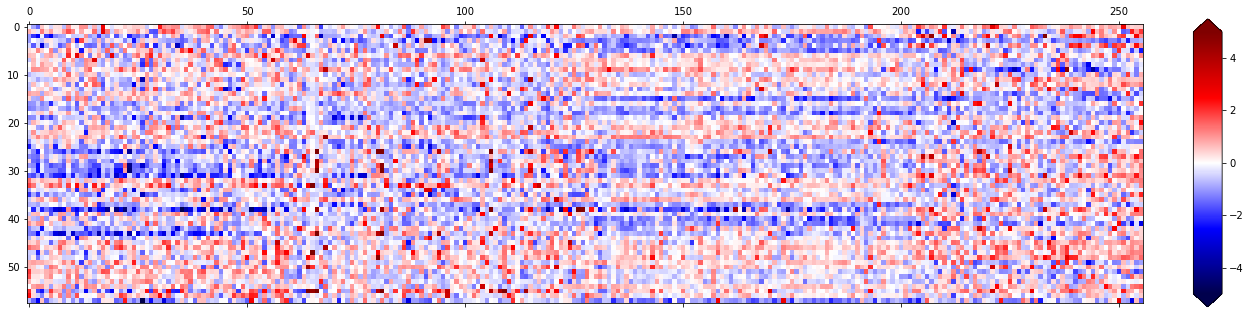

16000 [D loss: -0.736331] [G loss: -12.638134]


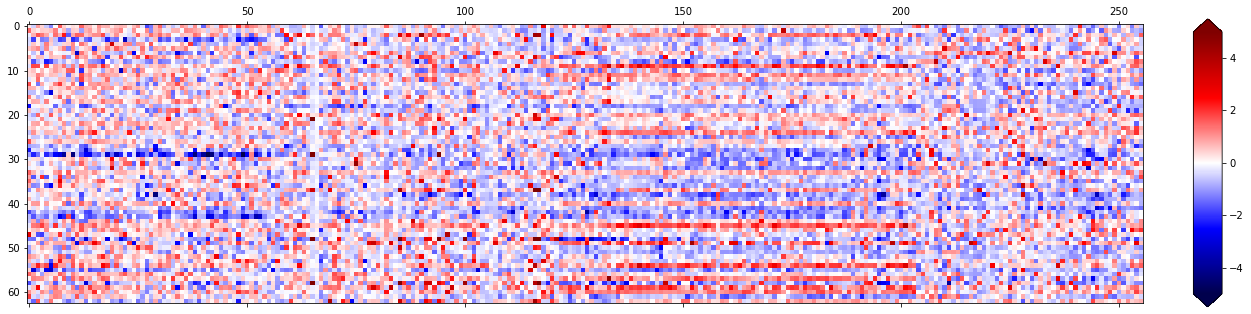

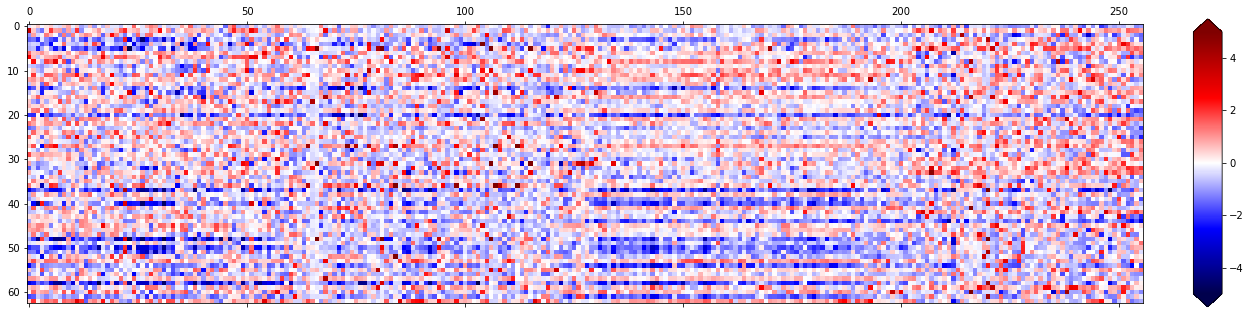

17000 [D loss: -0.874721] [G loss: -11.342028]


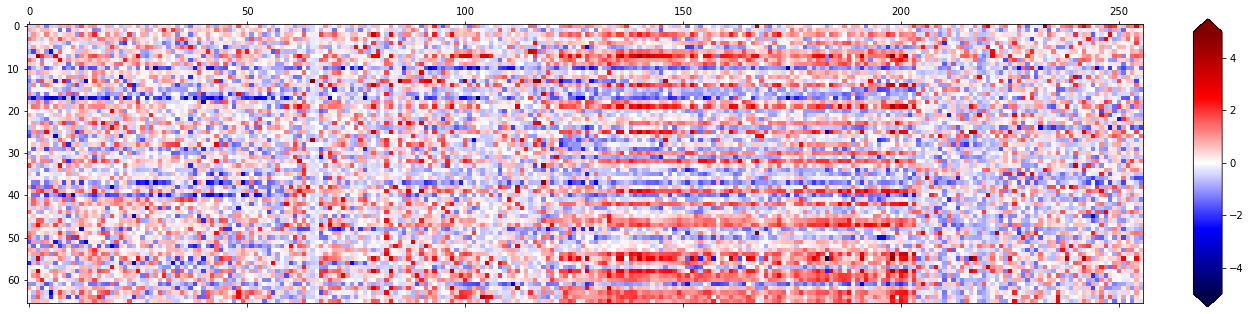

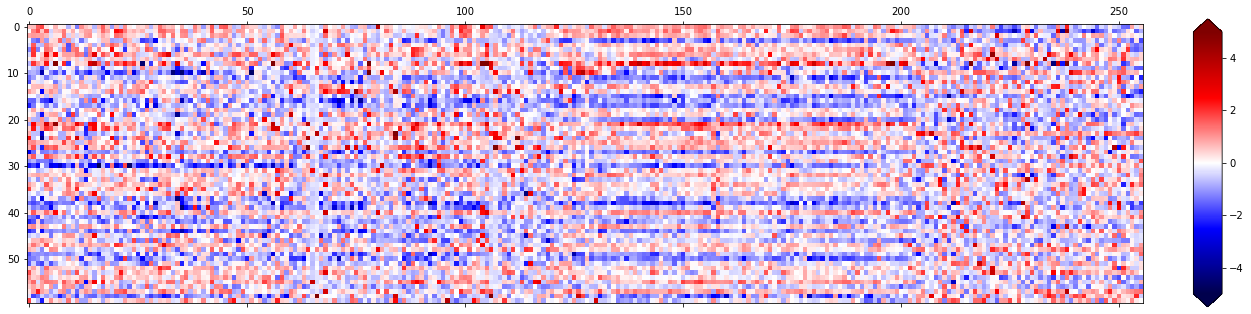

18000 [D loss: -1.077270] [G loss: -11.134080]


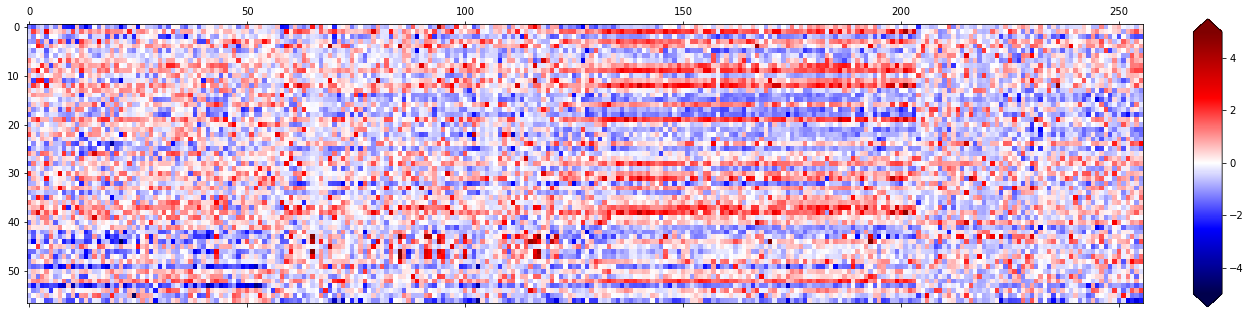

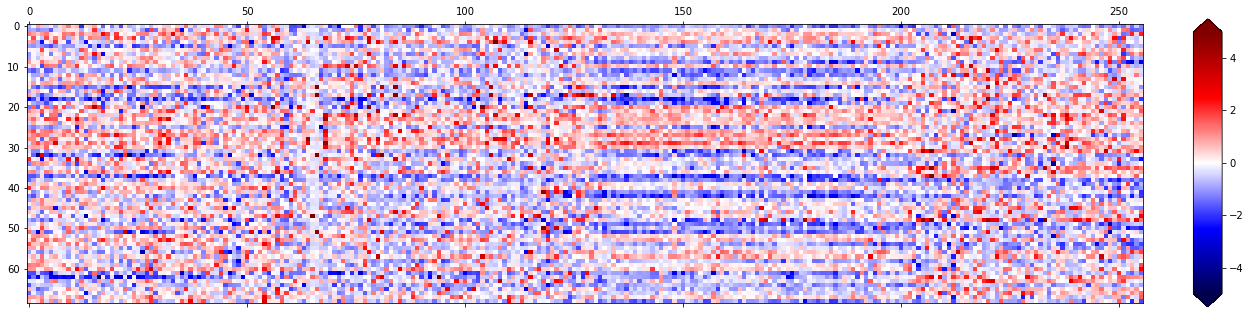

19000 [D loss: -0.583413] [G loss: -10.551186]


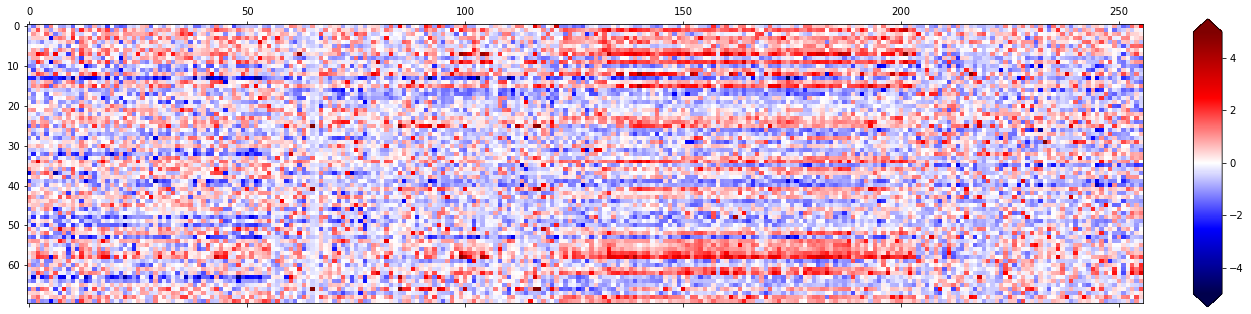

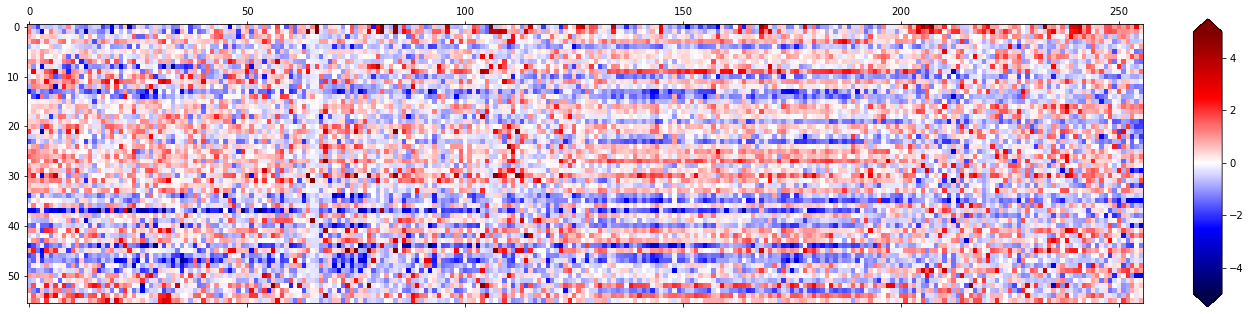

20000 [D loss: -1.010944] [G loss: -9.615910]


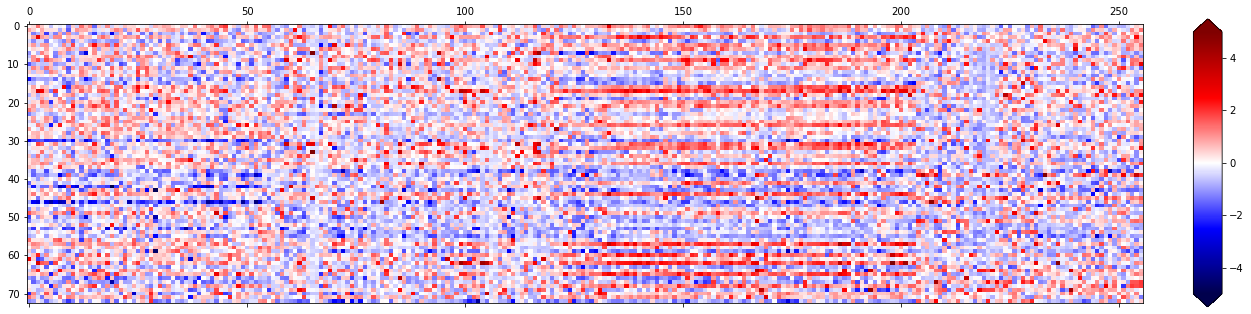

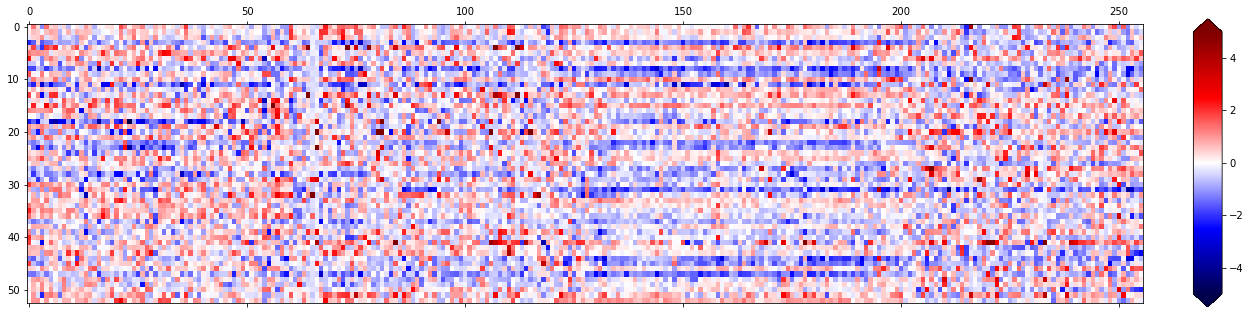

In [12]:
wgan.train(show_progress=True)

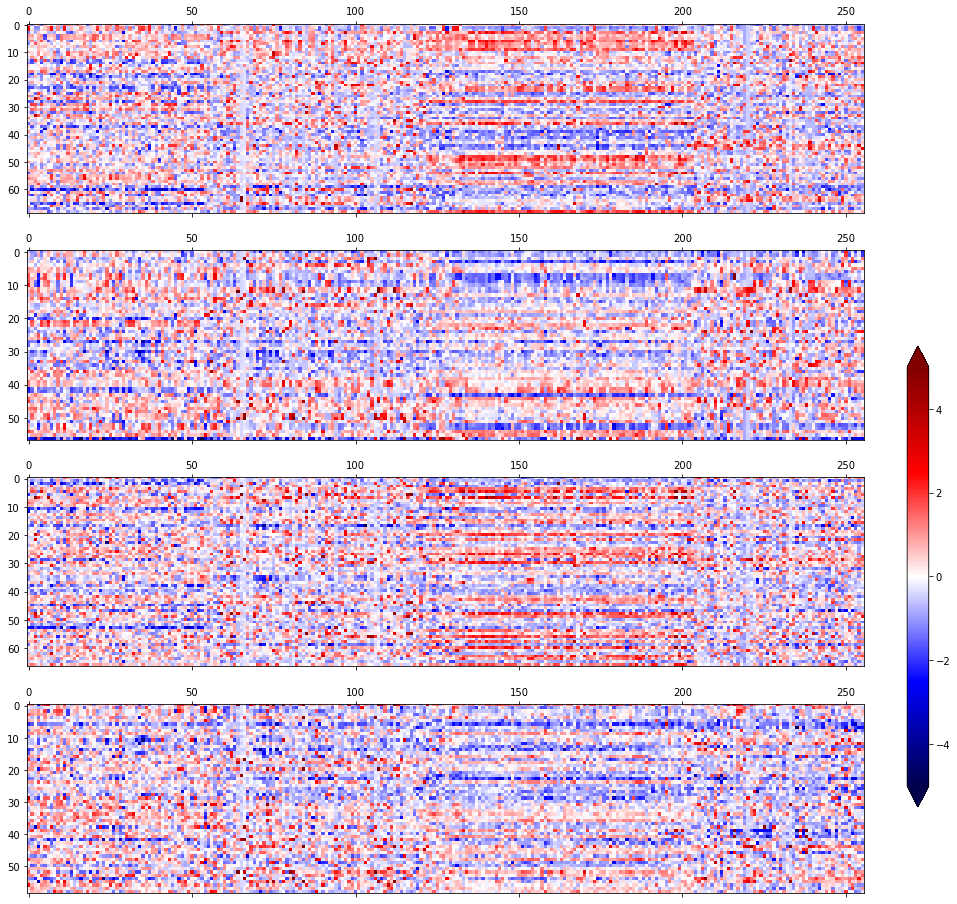

In [13]:
num_epochs = 20000
X_fake, y_fake = wgan.generate(n_samples=exp.X_train.shape[0], epoch=num_epochs)
exp.visualize(X_train=exp.X_train, y_train=exp.y_train, X_test=X_fake, y_test=y_fake)

In [14]:
import numpy as np
np.unique([1, 1, 0, 1])

array([0, 1])

In [28]:
exp.X_train.shape

(126, 256)